In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/titanic/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
for col in df.columns[1:]:
    print(col)
    print(df[col].unique())

Survived
[0 1]
Pclass
[3 1 2]
Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'D

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# 전처리 
# PassengerId --> 삭제
# Pclass --> 사용
# Name --> 삭제
# Sex --> 사용
# Age --> 사용
# SibSp, Parch --> 사용
# Ticket --> 삭제
# Fare --> 사용
# Cabin --> 삭제
# Embarked --> 사용
# 불필요한 컬럼 삭제
df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)

In [20]:
# NaN 값 처리 (Age, Embarked)
# Age 컬럼 처리 (평균값으로 채워 넣기)
df.Age.fillna(df.Age.mean(), inplace = True)

In [30]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# Embarked 컬럼 처리 (최빈값으로 채워 넣기)
#df.Embarked.value_counts()
df.Embarked.fillna('S', inplace = True)

In [ ]:
df.Embarked

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [36]:
# 문자열 피쳐를 숫자로 변환 (인코딩)
# Sex : 라벨인코딩
# Embarked : 원핫 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.Sex)
df.Sex = le.transform(df.Sex)
# fit()과 transform()은 fit_transform() 함수로 한번에 수행 가능

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [43]:
# Embarked을 원핫 인코딩으로 변환
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder()
ohe.fit_transform(df.Embarked.values.reshape(-1,1)) 
# 원핫 인코딩할 때에는 sklearn.preprocessing.OneHotEncoder 대신에 pandas.get_dummies() 함수 활용을 추천
embarked_ohe = pd.get_dummies(df.Embarked)

In [45]:
# 원핫 인코딩 결과를 데이터프레임(df)에 추가 
df = pd.concat([df, embarked_ohe], axis = 1)

In [46]:
# Embarked 컬럼 삭제
df.drop('Embarked', axis = 1, inplace = True) 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 48.0 KB


In [58]:
# Age 컬럼을 활용해서 Age_group 컬럼을 생성
# 0~5(Baby), 6~12(Child), 13~18(Teenager), 19~25(Student), 26~35(Young Adult), 36~60(Adult), 61~(Elderly)

# np.digitize() 함수 활용
import numpy as np
#sr = pd.Series([5, 15, 23, 31, 28])
#np.digitize(sr, [10, 20, 30])
df['Age_group'] = np.digitize(df.Age, [6, 13, 19, 26, 36, 61])
df.drop('Age', axis = 1, inplace= True)

In [59]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,C,Q,S,Age_group
0,0,3,1,1,0,7.2500,0,0,1,3
1,1,1,0,1,0,71.2833,1,0,0,5
2,1,3,0,0,0,7.9250,0,0,1,4
3,1,1,0,1,0,53.1000,0,0,1,4
4,0,3,1,0,0,8.0500,0,0,1,4


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [61]:
# 학습용/테스트용 데이터 분리
df_y = df.Survived
df_X = df.drop('Survived', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y)

In [66]:
# 결정트리 객체 생성
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9461077844311377
0.7713004484304933


In [67]:
#GridSearchCV 활용
params = {
    'max_depth': [3,5,7],
    'min_samples_split':[5, 10, 15]
}
grid_dt = GridSearchCV(dt, param_grid = params, cv = 5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 15]})

In [68]:
print(grid_dt.score(X_train, y_train))
print(grid_dt.score(X_test, y_test))

0.8877245508982036
0.7982062780269058


In [69]:
grid_dt.best_params_

{'max_depth': 7, 'min_samples_split': 5}

In [70]:
grid_dt.cv_results_

{'mean_fit_time': array([0.00219445, 0.00200009, 0.00219803, 0.00200081, 0.00218668,
        0.0021945 , 0.00239267, 0.00199308, 0.00238719]),
 'std_fit_time': array([3.99290163e-04, 1.06421252e-05, 3.95467518e-04, 1.11858721e-05,
        3.87370240e-04, 3.98707857e-04, 4.88890063e-04, 1.97528030e-06,
        7.86720195e-04]),
 'mean_score_time': array([0.00140123, 0.00158496, 0.00119309, 0.00099063, 0.00179715,
        0.00139575, 0.00120401, 0.00119772, 0.00140257]),
 'std_score_time': array([4.73650570e-04, 5.02886434e-04, 4.03300609e-04, 1.17586535e-05,
        7.46221944e-04, 4.88091722e-04, 4.09851898e-04, 3.98091482e-04,
        4.93803969e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 10, 15, 5, 10, 15, 5, 10, 15],
              mask=[False, False, 

In [73]:
df_X

,Pclass,Sex,SibSp,Parch,Fare,C,Q,S,Age_group
0,3,1,1,0,7.2500,0,0,1,3
1,1,0,1,0,71.2833,1,0,0,5
2,3,0,0,0,7.9250,0,0,1,4
3,1,0,1,0,53.1000,0,0,1,4
4,3,1,0,0,8.0500,0,0,1,4
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,0,0,1,4
887,1,0,0,0,30.0000,0,0,1,3
888,3,0,1,2,23.4500,0,0,1,4
889,1,1,0,0,30.0000,1,0,0,4


<AxesSubplot:ylabel='feature'>

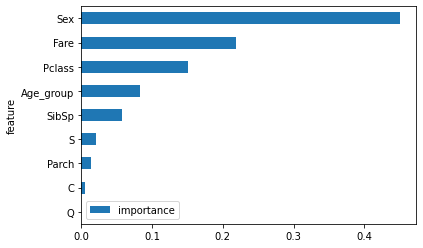

In [82]:
# feature 중요도 
f_imp = pd.DataFrame({
    'feature': df_X.columns, 
    'importance': grid_dt.best_estimator_.feature_importances_
})
f_imp.sort_values(by = 'importance').plot(x = 'feature', y = 'importance', kind = 'barh')

In [ ]:
# 결정트리 시각화
# conda install graphviz
# conda install python-graphviz

In [85]:
import graphviz
from sklearn import tree

In [89]:
# 시각화를 위한 간단한 결정트리 생성
dt1 = DecisionTreeClassifier(max_depth = 2)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [90]:
data = tree.export_graphviz(dt1)

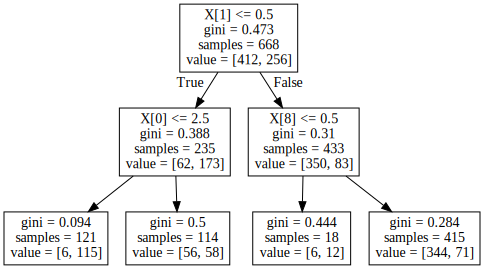

In [91]:
graph = graphviz.Source(data)
graph

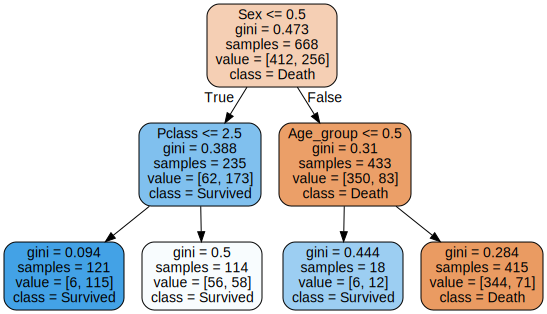

In [94]:
data = tree.export_graphviz(dt1,
                           feature_names = df_X.columns, 
                           class_names = ['Death','Survived'], 
                           filled = True,
                           rounded = True)
graph = graphviz.Source(data)
graph

In [95]:
graph.render('titanic_prediction')

'titanic_prediction.pdf'